C:\Users\Cuyi\AppData\Local\Temp\ipykernel_14812\4073132425.py:14: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_poly_exterior = gpd.GeoDataFrame({'geometry': [polygon.buffer(-0.0000001).exterior]}).explode().reset_index()
C:\Users\Cuyi\AppData\Local\Temp\ipykernel_14812\4073132425.py:30: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_poly_voronoi = gpd.GeoDataFrame({'geometry': poly_shapes}).explode().reset_index()


0.375


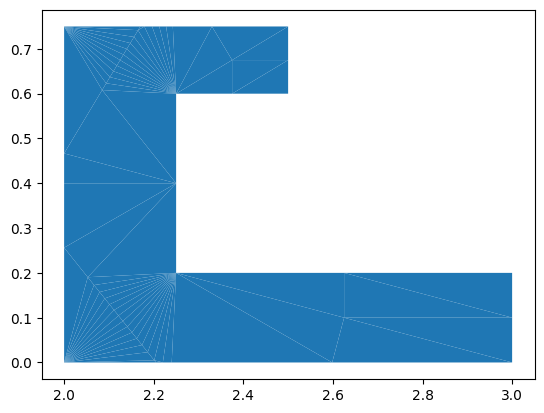

In [13]:
import numpy as np
from shapely.geometry import Polygon
from shapely.ops import triangulate
import shapely.wkt
import geopandas as gpd
from geovoronoi import voronoi_regions_from_coords
from vem import vem, plot_solution


def to_triangles(polygon):

    poly_points = []

    gdf_poly_exterior = gpd.GeoDataFrame({'geometry': [polygon.buffer(-0.0000001).exterior]}).explode().reset_index()
    for geom in gdf_poly_exterior.geometry:
        poly_points += np.array(geom.coords).tolist()

    try:
        polygon.interiors[0]
    except:
        poly_points = poly_points
    else:
        gdf_poly_interior = gpd.GeoDataFrame({'geometry': [polygon.interiors]}).explode().reset_index()
        for geom in gdf_poly_interior.geometry:
          poly_points += np.array(geom.coords).tolist()

    poly_points = np.array([item for sublist in poly_points for item in sublist]).reshape(-1,2)

    poly_shapes, pts = voronoi_regions_from_coords(poly_points, polygon)
    gdf_poly_voronoi = gpd.GeoDataFrame({'geometry': poly_shapes}).explode().reset_index()
    #gdf_poly_voronoi.plot()

    tri_geom = []
    for geom in gdf_poly_voronoi.geometry:
        inside_triangles = [tri for tri in triangulate(geom) if tri.centroid.within(polygon)]
        tri_geom += inside_triangles

    gdf_poly_triangles = gpd.GeoDataFrame({'geometry': tri_geom})

    #gdf_poly_exterior.plot()
    #if 'gdf_poly_interior' in locals():
    #    gdf_poly_interior.plot()
    #gdf_poly_triangles.plot()
    return gdf_poly_triangles

polygon_2 = Polygon([(3.0, 0.0), (2.0, 0.0), (2.0, 0.75), (2.5, 0.75), (2.5, 0.6), (2.25, 0.6), (2.25, 0.2), (3.0, 0.2), (3.0, 0.0)])

to_triangles(polygon_2).plot()

print(polygon_2.area)



In [ ]:
u = vem(str(NumPoints) + "uniform.polylla.mat", domain_rhs, domain_boundary_condition)